In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder



In [4]:
df = pd.read_csv('/content/shopping_trends_updated.csv')


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         39

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used    

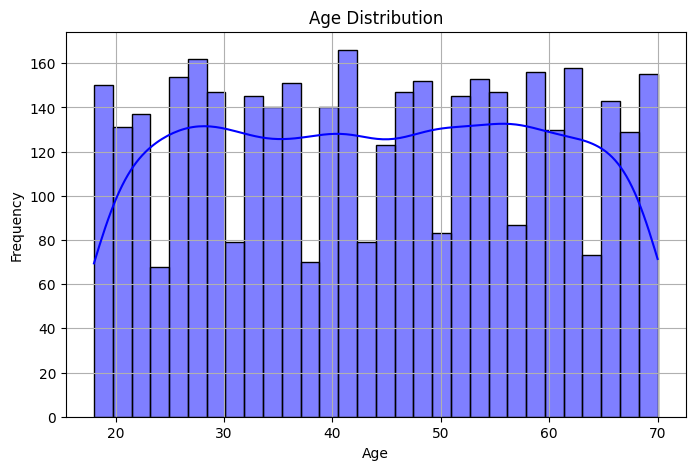

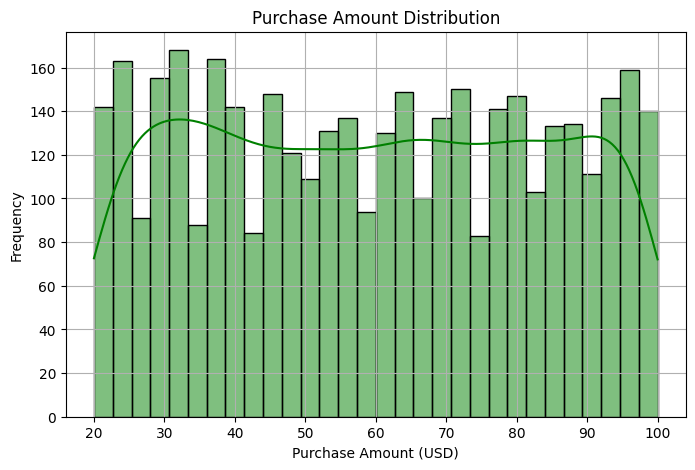

<ipython-input-30-5d95bc6279a2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


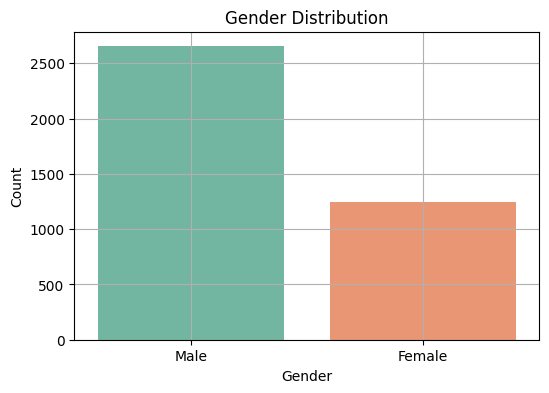

<ipython-input-30-5d95bc6279a2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


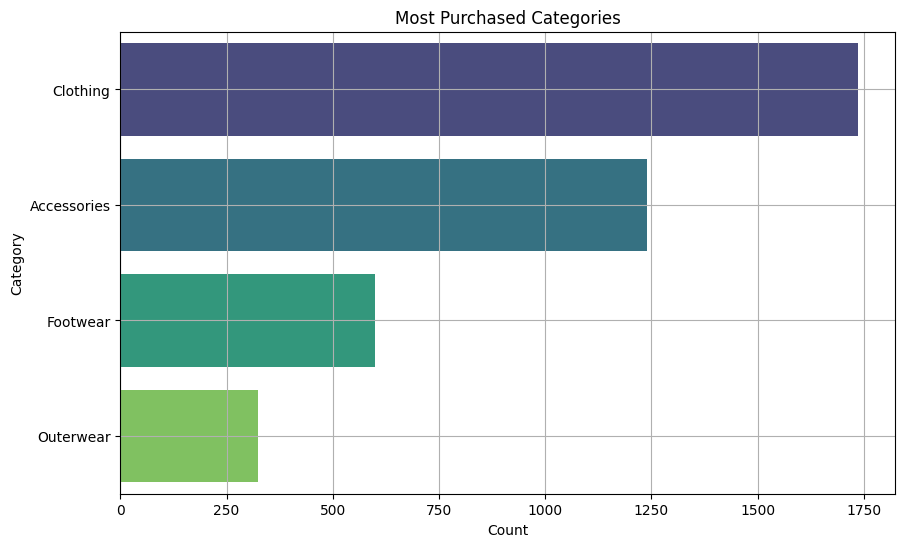

<ipython-input-30-5d95bc6279a2>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='coolwarm')


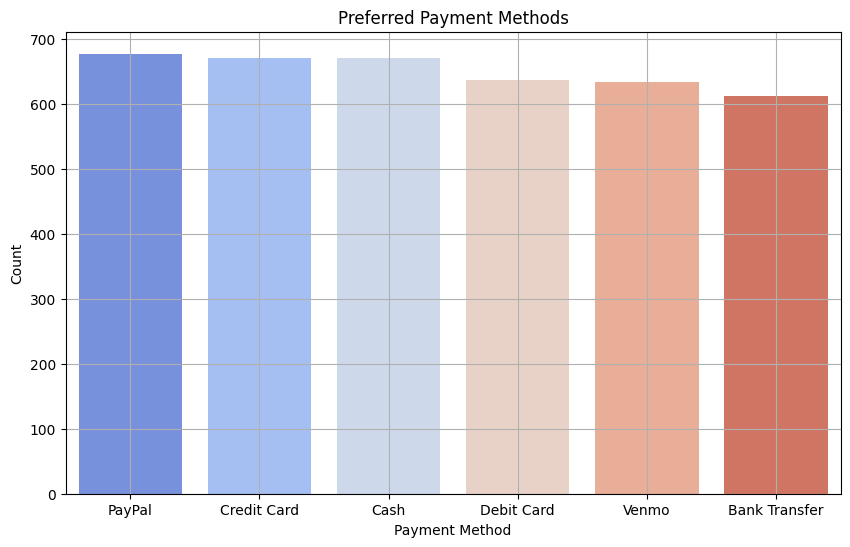

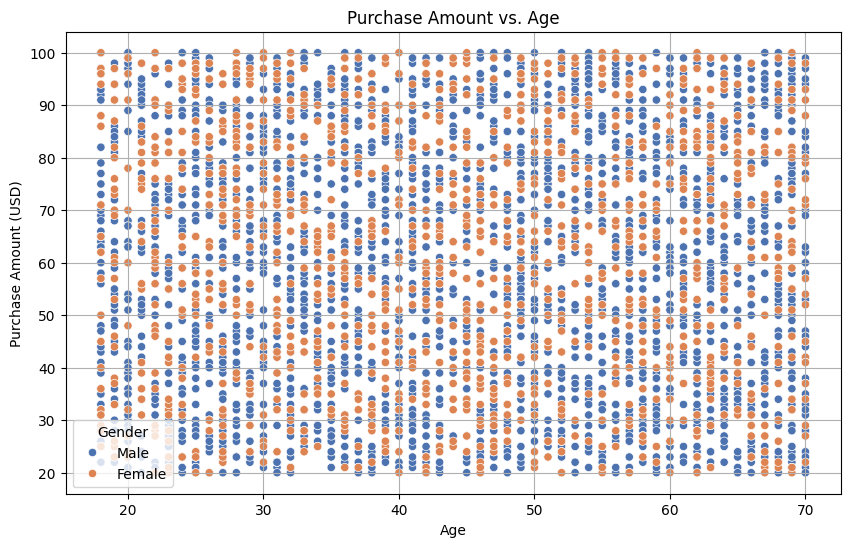

<ipython-input-30-5d95bc6279a2>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Review Rating', data=df, palette='plasma')


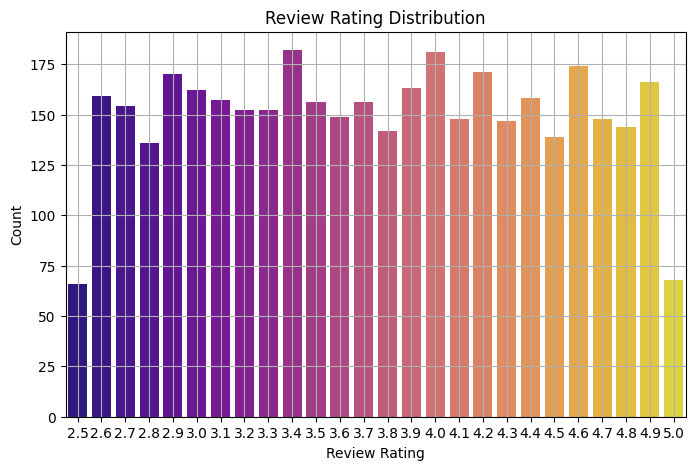

In [30]:
from collections import defaultdict
#Basic Information about the dataset
print("Dataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

#Distribution of 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Distribution of 'Purchase Amount (USD)'
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color='green')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Count of each category in 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Most common 'Category' of items purchased
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Most Purchased Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True)
plt.show()

#Preferred Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index, palette='coolwarm')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Relationship between 'Purchase Amount (USD)' and 'Age'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df, palette='deep')
plt.title('Purchase Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True)
plt.show()

#Analysis of 'Review Rating'
plt.figure(figsize=(8, 5))
sns.countplot(x='Review Rating', data=df, palette='plasma')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [6]:
#Data cleaning
print("Missing Values before cleaning:\n", df.isnull().sum())


Missing Values before cleaning:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [7]:
#Handling missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-7-4cf85326d6f6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-7-4cf85326d6f6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

Number of duplicate rows after cleaning: 0


In [9]:
#Standardizing text data (lowercasing and stripping whitespaces) for consistency
text_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size',
                'Color', 'Season', 'Subscription Status', 'Payment Method',
                'Shipping Type', 'Discount Applied', 'Promo Code Used',
                'Frequency of Purchases']
for column in text_columns:
    if column in df.columns:
        df[column] = df[column].str.lower().str.strip()
    else:
        print(f"Column '{column}' not found in the dataset.")


In [10]:
#Converting data types of numerical columns if needed
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [11]:
#Display the cleaned dataset summary
print("Cleaned Data Summary:")
print(df.info())

Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used   

In [12]:
categorical_columns = ['Gender', 'Item Purchased', 'Location', 'Size', 'Color',
                       'Season', 'Subscription Status', 'Payment Method',
                       'Shipping Type', 'Discount Applied', 'Promo Code Used',
                       'Frequency of Purchases']

#Encoding categorical variables using LabelEncoder
label_encoders = {}
for column in categorical_columns:
    if column in df.columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    else:
        print(f"Warning: Column '{column}' not found in the dataset and will be skipped.")


In [13]:
#Feature scaling using StandardScaler for numerical columns
scaler = StandardScaler()
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
#Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['Category'])
y = df['Category']


In [15]:
#Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Display the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3120, 17)
Testing set shape: (780, 17)


In [17]:
#Model Building and Training
#Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)


In [18]:
# Train the model using the training data
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Predict the target values for the test set
y_pred_logistic = logistic_model.predict(X_test)

In [20]:
# Calculate the accuracy of the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model Accuracy: {logistic_accuracy * 100:.2f}%")

Logistic Regression Model Accuracy: 54.23%


In [21]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [22]:
# Train the model using the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict the target values for the test set
y_pred_rf = random_forest_model.predict(X_test)

In [24]:
# Calculate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Model Accuracy: 79.74%


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode the target variable (y) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

svc_model = SVC(kernel='linear', random_state=42)

svc_model.fit(X_train, y_train_encoded)

y_pred_svc = svc_model.predict(X_test)

y_pred_svc_labels = label_encoder.inverse_transform(y_pred_svc)

svc_accuracy = accuracy_score(y_test_encoded, y_pred_svc)
print(f"SVC Model Accuracy: {svc_accuracy * 100:.2f}%")


SVC Model Accuracy: 53.97%


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode the target variable (y) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_model.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

from sklearn.metrics import accuracy_score
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:19:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 61.54%
